<a href="https://colab.research.google.com/github/viniciusdutra314/LabIFSC/blob/master/monte_carlos_exemplos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/viniciusdutra314/LabIFSC

from LabIFSC import*
import numpy as np
import matplotlib.pyplot as plt


## Probabilidade $[a,b]$

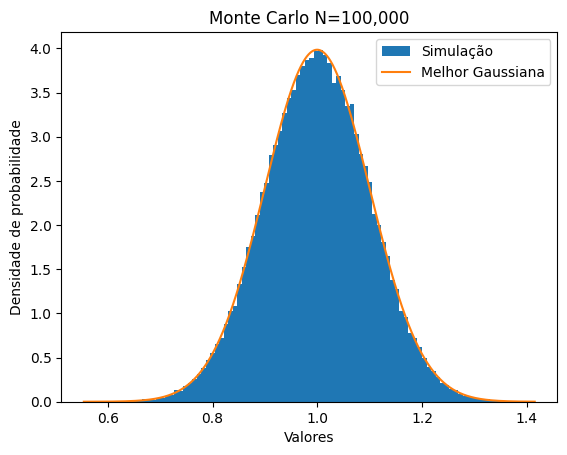

0.68109


In [2]:
a=Medida((1,0.1),"")
print(montecarlo(lambda x:x,a,probabilidade=[0.9,1.1],hist=True))

## Casos em que os métodos são equivalentes

### $$x+y$$

In [10]:
x=Medida((30,4),"kg")
y=Medida((5,0.3),"kg")
print("---Medida---")
print(x+y)
x=MCarlo((30,4),"kg")
y=MCarlo((5,0.3),"kg")
print("---MCarlo---")
print(x+y)

---Medida---
(35±4) kg
---MCarlo---
(35±4) kg


### $$x*y$$

In [12]:
x=Medida((11,0.1),"kg")
y=Medida((2,0.1),"kg")
print("---Medida---")
print(x*y)
x=MCarlo((11,0.1),"kg")
y=MCarlo((2,0.1),"kg")
print("---MCarlo---")
print(x*y)

---Medida---
(22±1) kg²
---MCarlo---
(22±1) kg²


## *Casos que a aproximação linear não funciona*


#### Incertezas muito grandes $$f(A,\omega,\phi)=Asin(\omega+\phi)$$

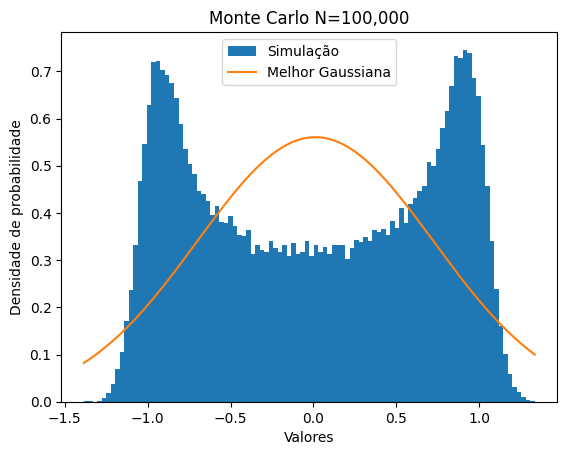

0.33673


In [25]:
A=MCarlo((1,0.1),"m")
omega=MCarlo((2,3),"s^-1")
phi=MCarlo((0,0.1),"s")
print(montecarlo(lambda A,omega,phi: A*sin(omega+phi),A,omega,phi,hist=True,probabilidade=[-0.5,0.5]))

#### Exponenciais $$f(k,t)=e^{kt}$$

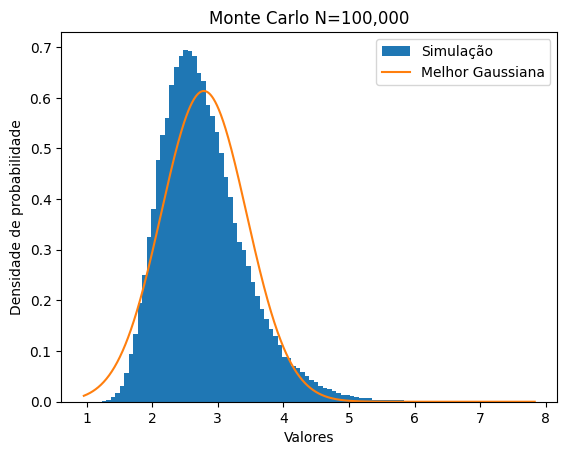

(2.8±0.7) 


In [20]:
k=Medida((1,0.1),"s^-1")
t=Medida((1,0.2),"s")
import numpy as np
print(montecarlo(lambda k,t: np.exp(k*t),k,t,hist=True))

$$f(x)=x^2e^xtan(x/10)*\Gamma(\sqrt{x})$$

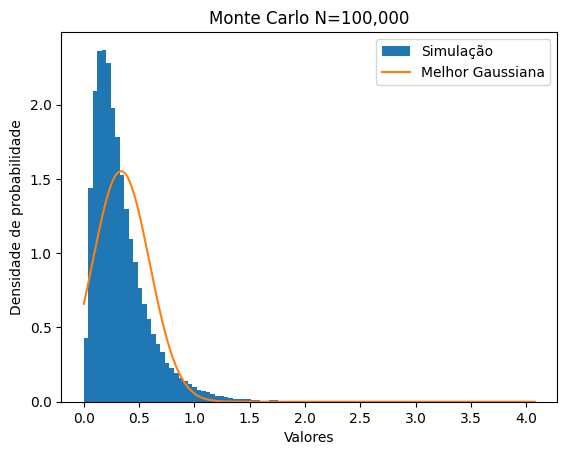

(0.3±0.3) 


In [26]:
from math import gamma
def f(x): return (x**2)*np.exp(x)*np.tan(x/10)*gamma(x**(0.5))
x=Medida((1,0.2),"")
print(montecarlo(f,x,hist=True))

# Testes

In [27]:
#68-95-97 rule
print(montecarlo(lambda y: y, Medida((1,0.1),''),probabilidade=[1-1*0.1,1+1*0.1],N=int(1e4)))
print(montecarlo(lambda y: y, Medida((1,0.1),''),probabilidade=[1-2*0.1,1+2*0.1],N=int(1e4)))
print(montecarlo(lambda y: y, Medida((1,0.1),''),probabilidade=[1-3*0.1,1+3*0.1],N=int(1e4)))
#operações básicas
a=Medida((1,0.1),"")
b=Medida((2,0.05),"")
assert montecarlo(lambda x,y: x+y,a,b)==a+b
assert montecarlo(lambda x,y: x-y,a,b)==a-b
assert montecarlo(lambda x,y: x*y,a,b)==a*b
assert montecarlo(lambda x,y: x/y,a,b)==a/b
#funções LabIFSC
m1=Medida((20,1.5),"")
assert montecarlo(lambda x: cos(m1),m1)==cos(m1)
assert montecarlo(lambda x: sin(m1),m1)==sin(m1)
assert montecarlo(lambda x: tan(m1),m1)==tan(m1)
m1=Medida((0.4,0.01),"")
assert montecarlo(lambda x: arc_cos(m1),m1)==arc_cos(m1)
assert montecarlo(lambda x: arc_sin(m1),m1)==arc_sin(m1)
assert montecarlo(lambda x: arc_tan(m1),m1)==arc_tan(m1)
m1=Medida((1.2,0.01),"")
assert montecarlo(lambda x: ln(m1),m1)==ln(m1)
assert montecarlo(lambda x: log2(m1),m1)==log2(m1)
assert montecarlo(lambda x: log10(m1),m1)==log10(m1)
assert montecarlo(lambda x: sqrt(m1),m1)==sqrt(m1)


0.6831
0.9551
0.9969
